In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from algorithms import *
from benchmark import *

test_functions =[StybliskiTang, Rastrigin, Rosenbrock, Beale, Sphere, Perm, GoldsteinPrice, Ackley, Bohachevsky]

## Optimization algorithms behaviour

### 1 -Bayesian Optimization function

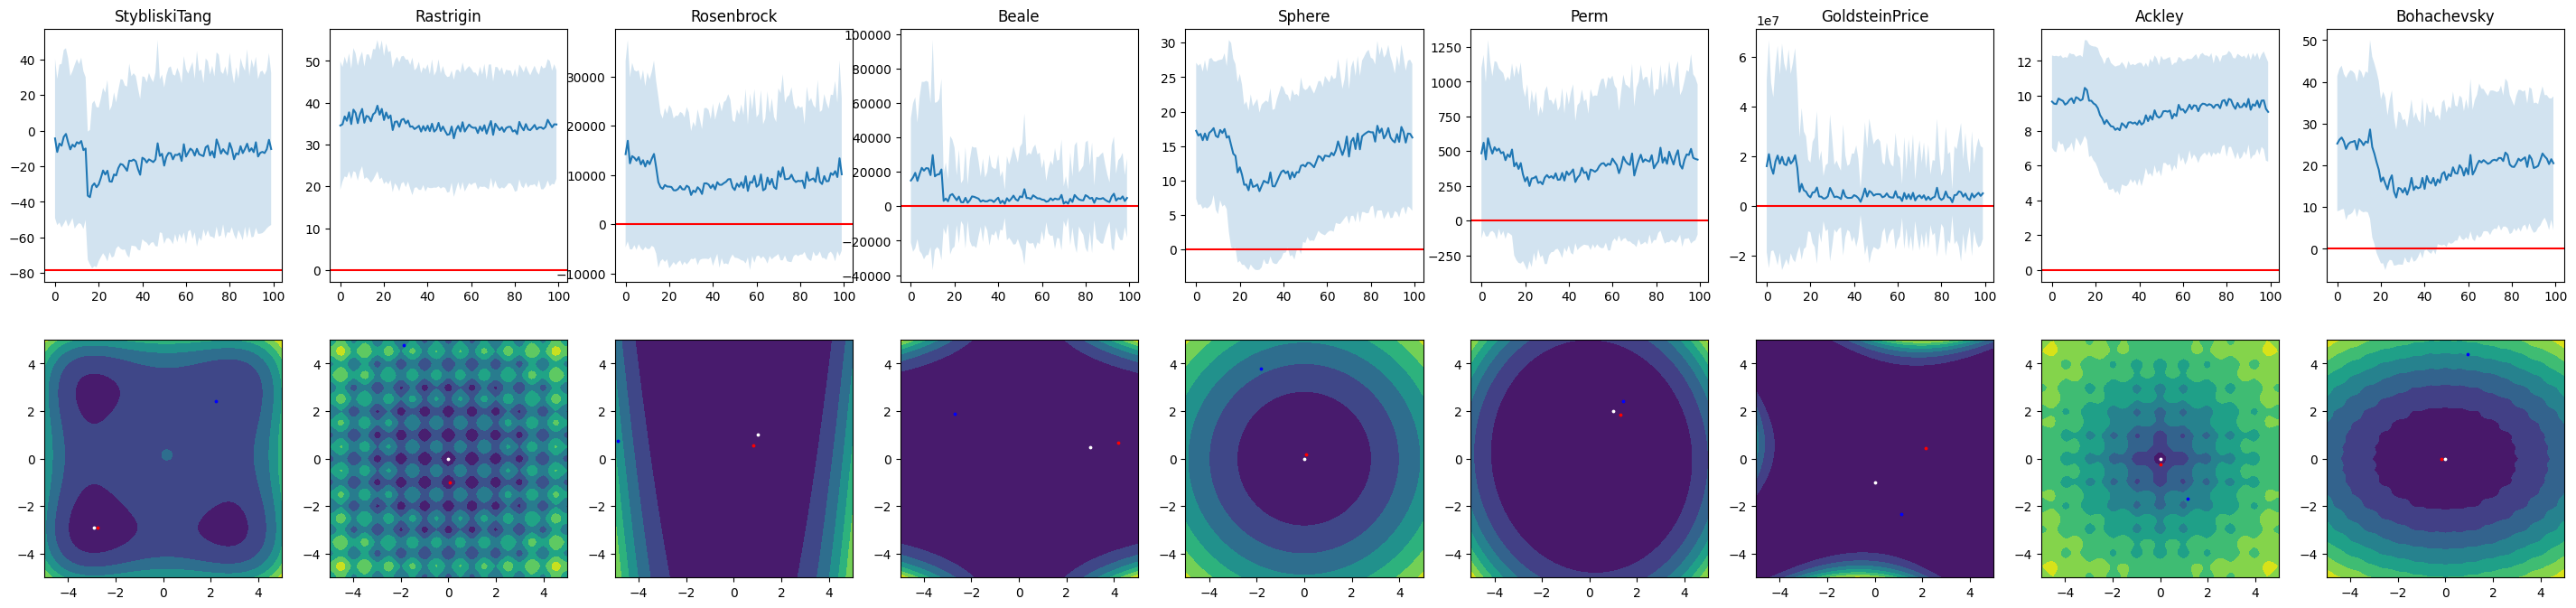

In [6]:
budget = 100
tests  = 250

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))

for idx, fcn in enumerate(test_functions):

    Fx = fcn(points.T)

    # Draw the test function
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled')  
    Y_log = []
    for test in range(tests):
        Xmin, Ymin, X, Y = bayesian_optimization(fcn, n_samples=15, sampling_budget=budget, dimension=2, boundaries=[[-5, -5],[5,5]])
        Y_log.append(Y)
    Y_log = np.vstack(Y_log)

    Ystd  = np.std(Y_log, axis=0)
    Ymean = np.mean(Y_log, axis=0)


    # Draw the analyzed points
    #for x in X: ax[1,idx].scatter(x[0], x[1], c="orange", s=2)

    # Draw the initial and final point (or best)
    ax[1,idx].scatter(X[0,0],  X[0,1],  c="blue", s=3)
    ax[1,idx].scatter(Xmin[0], Xmin[1], c="red",  s=3)

    # Draw the true minimum
    Xmin_true = points[np.argmin(Fx)]
    ax[1,idx].scatter(Xmin_true[0], Xmin_true[1], c="white", s=3)

    # Plot the performances
    ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')

    ax[0,idx].plot(range(len(Ymean)), Ymean)
    ax[0,idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')

    ax[0,idx].set_title(fcn.__name__)
  
plt.show()

### 2 - Broyden–Fletcher–Goldfarb–Shanno optimization function

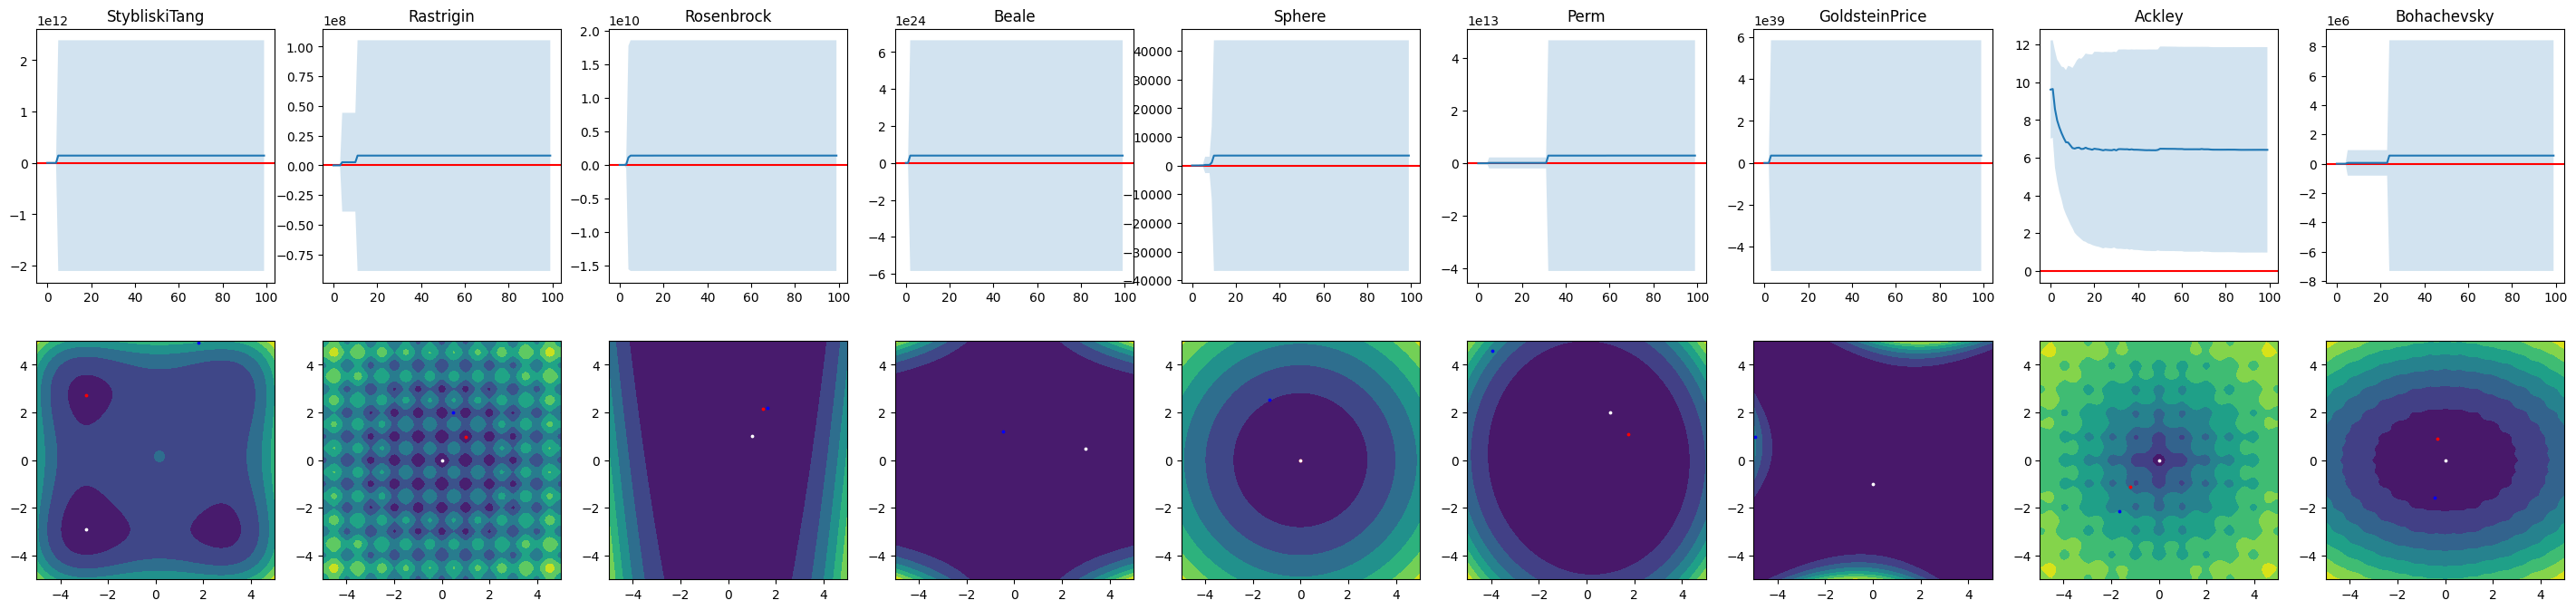

In [5]:
budget = 100
tests  = 250

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))

for idx, fcn in enumerate(test_functions):

    Fx = fcn(points.T)

    # Draw the test function
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled') 

    Y_log = []
    for test in range(tests):
        Xmin, Ymin, X, Y = bfgs(fcn, sampling_budget=budget, dimension=2, boundaries=[[-5, -5],[5,5]])
        Y_log.append(Y)

    lmin = 0
    for l in Y_log: 
        if (len(l)> lmin): lmin = len(l)

    for i,l in enumerate(Y_log): 
        if (len(l) < lmin):
            for x in range(lmin-len(l)): 
                Y_log[i] = np.append(Y_log[i], Y_log[i][-1])

    Y_log = np.vstack(Y_log)

    Ystd  = np.std(Y_log, axis=0)
    Ymean = np.mean(Y_log, axis=0)


    # Draw the analyzed points
    #for x in X: ax[1,idx].scatter(x[0], x[1], c="orange", s=2)

    # Draw the initial and final point (or best)
    ax[1,idx].scatter(X[0,0],  X[0,1],  c="blue", s=3)
    ax[1,idx].scatter(Xmin[0], Xmin[1], c="red",  s=3)

    # Draw the true minimum
    Xmin_true = points[np.argmin(Fx)]
    ax[1,idx].scatter(Xmin_true[0], Xmin_true[1], c="white", s=3)

    # Plot the performances
    ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')

    ax[0,idx].plot(range(len(Ymean)), Ymean)
    ax[0,idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')

    ax[0,idx].set_title(fcn.__name__)
  
plt.show()

### 3 - Latin Hypercube sampling function

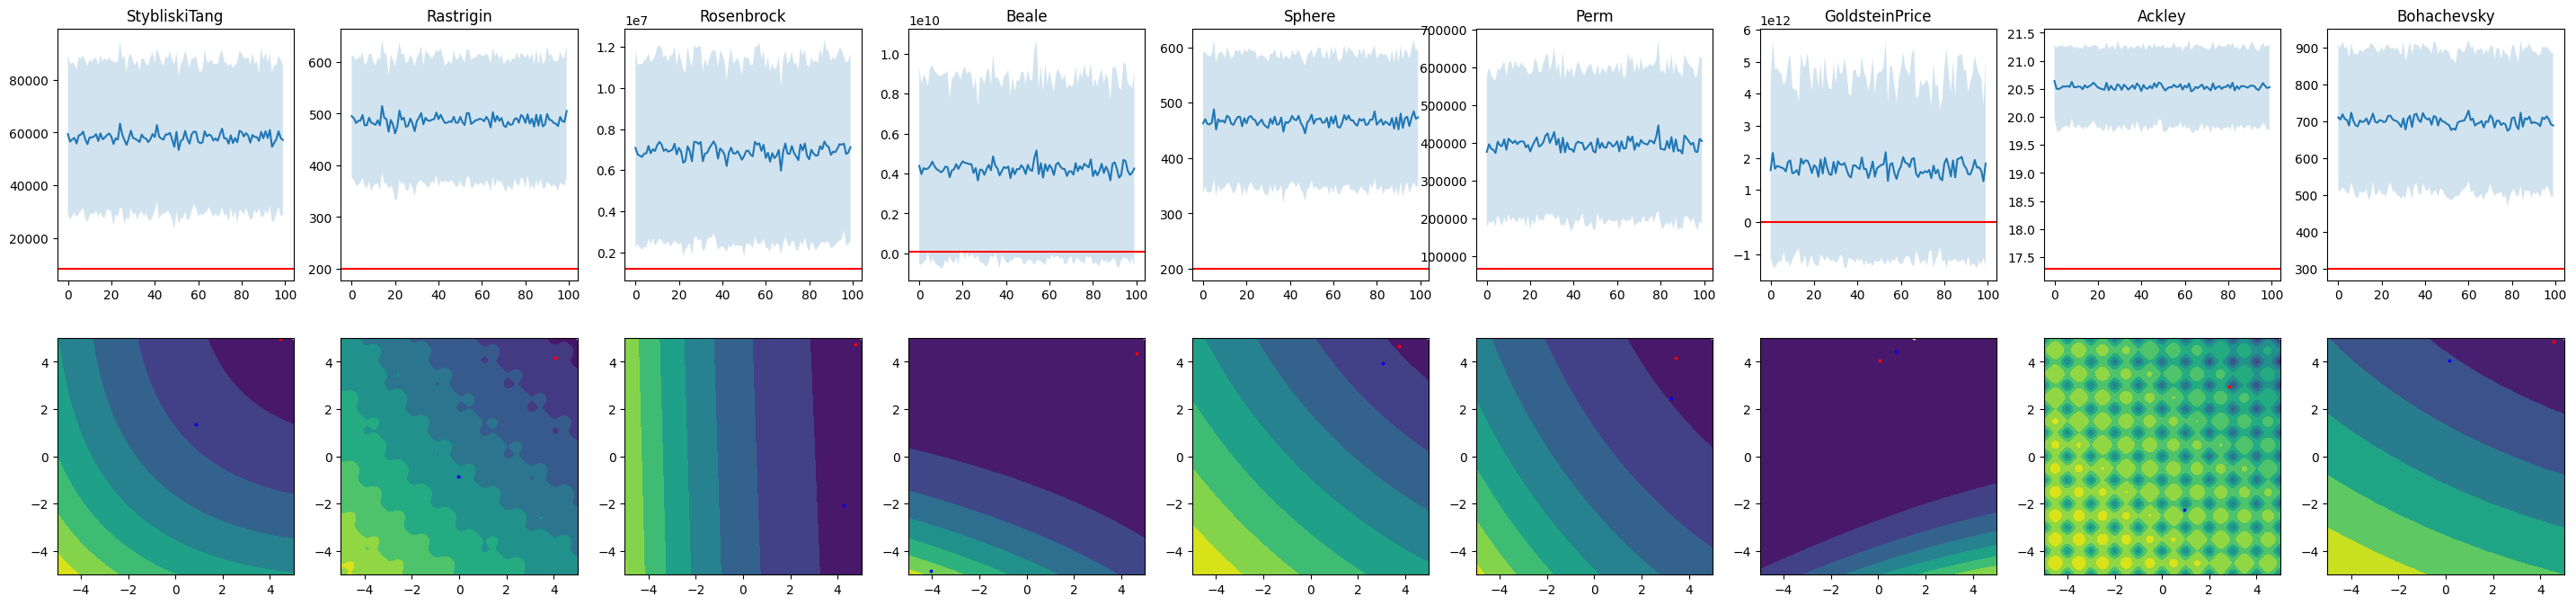

In [4]:
budget = 100
tests  = 250
X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))

for idx, fcn in enumerate(test_functions):

    # Apply offset
    test_function = lambda x: fcn(x - 15)

    Fx = test_function(points.T)

    # Draw the test function
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled')  

    Y_log = []
    for test in range(tests):
        Xmin, Ymin, X, Y = latin_hypercube(test_function, n_samples=budget, dimension=2, boundaries=[[-5, -5],[5,5]])
        Y_log.append(Y)

    lmin = 0
    for l in Y_log: 
        if (len(l)> lmin): lmin = len(l)

    for i,l in enumerate(Y_log): 
        if (len(l) < lmin):
            for x in range(lmin-len(l)): 
                Y_log[i] = np.append(Y_log[i], Y_log[i][-1])

    Y_log = np.vstack(Y_log)

    Ystd  = np.std(Y_log, axis=0)
    Ymean = np.mean(Y_log, axis=0)


    # Draw the analyzed points
    #for x in X: ax[1,idx].scatter(x[0], x[1], c="orange", s=2)

    # Draw the initial and final point (or best)
    ax[1,idx].scatter(X[0,0],  X[0,1],  c="blue", s=3)
    ax[1,idx].scatter(Xmin[0], Xmin[1], c="red",  s=3)

    # Draw the true minimum
    Xmin_true = points[np.argmin(Fx)]
    ax[1,idx].scatter(Xmin_true[0], Xmin_true[1], c="white", s=3)

    # Plot the performances
    ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')

    ax[0,idx].plot(range(len(Ymean)), Ymean)
    ax[0,idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')

    ax[0,idx].set_title(fcn.__name__)
  
plt.show()

### 4 - Nelder Mead optimization function

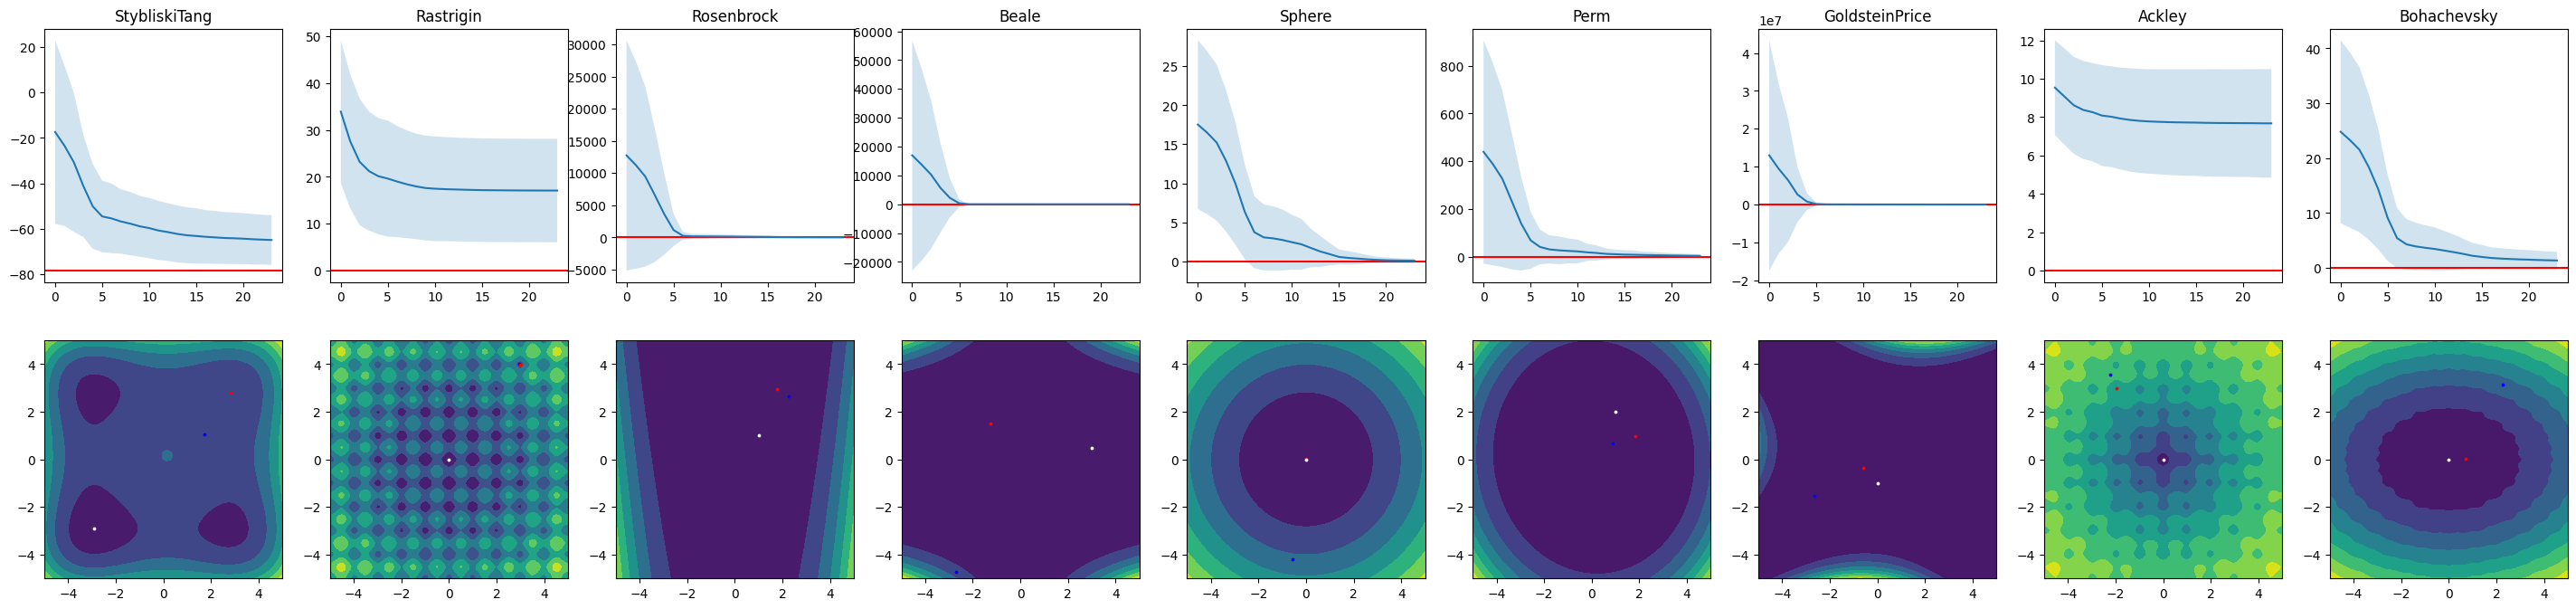

In [2]:
budget = 100
tests  = 250

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))

for idx, fcn in enumerate(test_functions):

    Fx = fcn(points.T)

    # Draw the test function
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled') 

    Y_log = []
    for test in range(tests):
        Xmin, Ymin, X, Y = nelder_mead(fcn, dimension=2, boundaries=[[-5, -5],[5,5]], sampling_budget=budget, alpha=1., gamma=2., rho=-0.5, sigma=0.5)
        Y_log.append(Y)

    lmin = 0
    for l in Y_log: 
        if (len(l)> lmin): lmin = len(l)

    for i,l in enumerate(Y_log): 
        if (len(l) < lmin):
            for x in range(lmin-len(l)): 
                Y_log[i] = np.append(Y_log[i], Y_log[i][-1])

    Y_log = np.vstack(Y_log)

    Ystd  = np.std(Y_log, axis=0)
    Ymean = np.mean(Y_log, axis=0)


    # Draw the analyzed points
    #for x in X: ax[1,idx].scatter(x[0], x[1], c="orange", s=2)

    # Draw the initial and final point (or best)
    ax[1,idx].scatter(X[0,0],  X[0,1],  c="blue", s=3)
    ax[1,idx].scatter(Xmin[0], Xmin[1], c="red",  s=3)

    # Draw the true minimum
    Xmin_true = points[np.argmin(Fx)]
    ax[1,idx].scatter(Xmin_true[0], Xmin_true[1], c="white", s=3)

    # Plot the performances
    ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')

    ax[0,idx].plot(range(len(Ymean)), Ymean)
    ax[0,idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')

    ax[0,idx].set_title(fcn.__name__)
  
plt.show()

### 5 -Particle Swarm optimization function

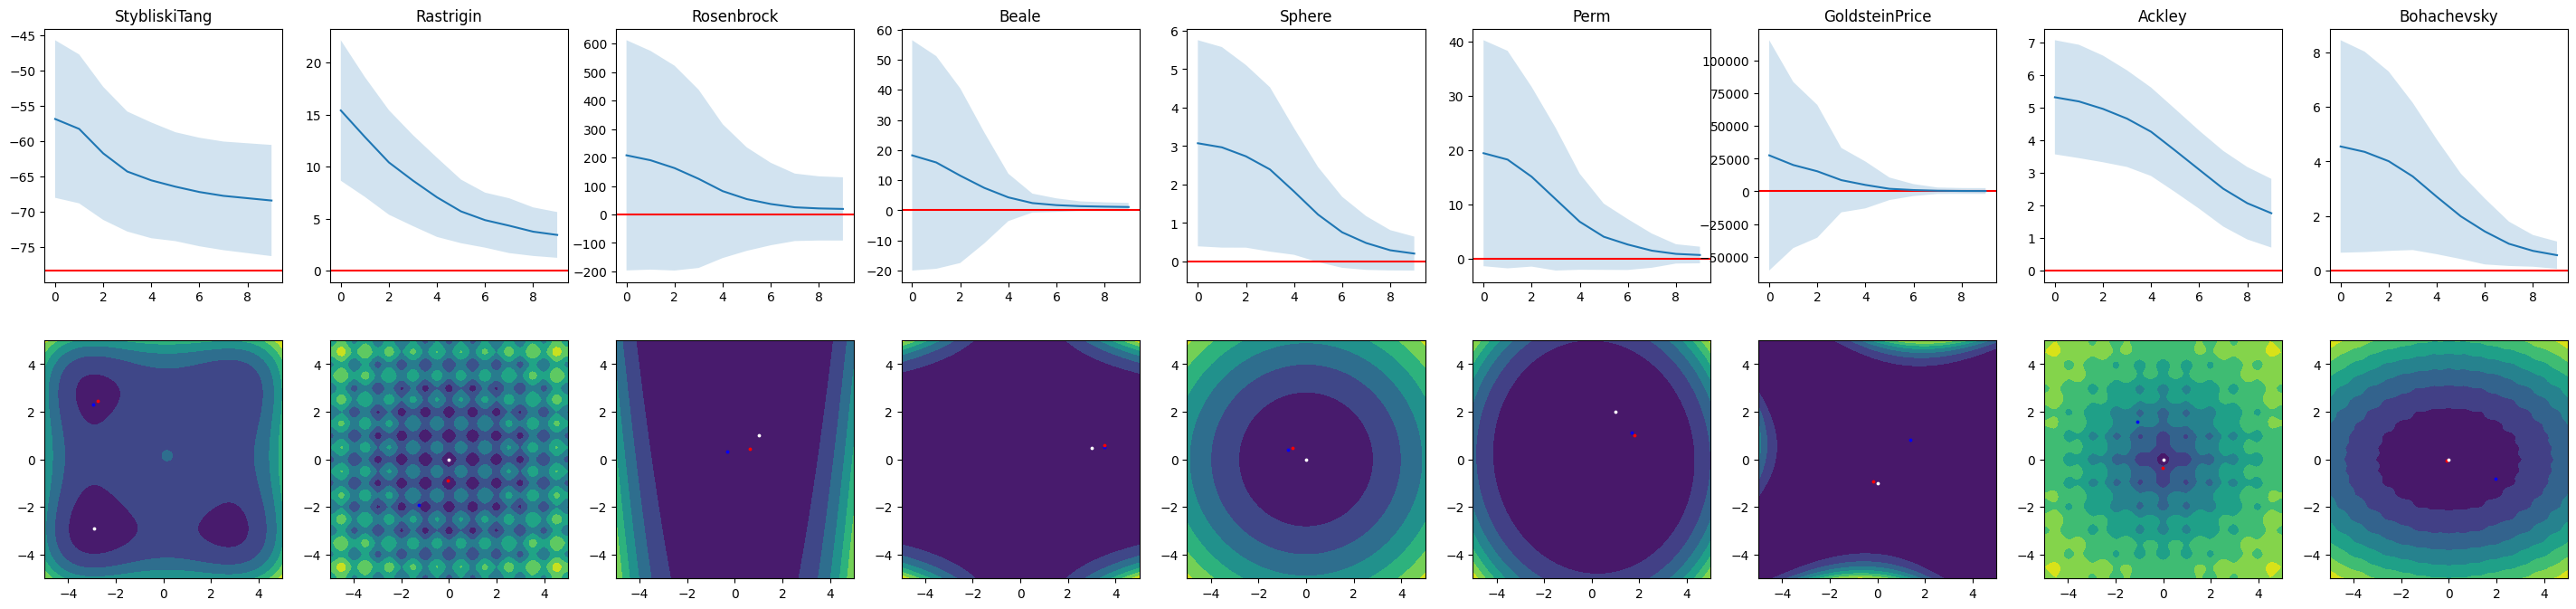

In [16]:
budget = 100
tests  = 250

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))

for idx, fcn in enumerate(test_functions):

    Fx = fcn(points.T)

    # Draw the test function
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled') 

    Y_log = []
    for test in range(tests):
        Xmin, Ymin, X, Y = particle_swarm(fcn, dimension=2, pos_boundaries=[[-5,-5],[5,5]], vel_boundaries=[[0,0],[0.1,0.1]], sampling_budget=budget, n_particles=10, tol=10e-6, c1=0.1, c2=0.1, w=0.8)
        Y_log.append(Y)
    Y_log = np.vstack(Y_log)

    Ystd  = np.std(Y_log, axis=0)
    Ymean = np.mean(Y_log, axis=0)


    # Draw the analyzed points
    #for x in X: ax[1,idx].scatter(x[0], x[1], c="orange", s=2)

    # Draw the initial and final point (or best)
    ax[1,idx].scatter(X[0,0],  X[0,1],  c="blue", s=3)
    ax[1,idx].scatter(Xmin[0], Xmin[1], c="red",  s=3)

    # Draw the true minimum
    Xmin_true = points[np.argmin(Fx)]
    ax[1,idx].scatter(Xmin_true[0], Xmin_true[1], c="white", s=3)

    # Plot the performances
    ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')

    ax[0,idx].plot(range(len(Ymean)), Ymean)
    ax[0,idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')

    ax[0,idx].set_title(fcn.__name__)
  
plt.show()

### 6 - Response Surface Modeling function

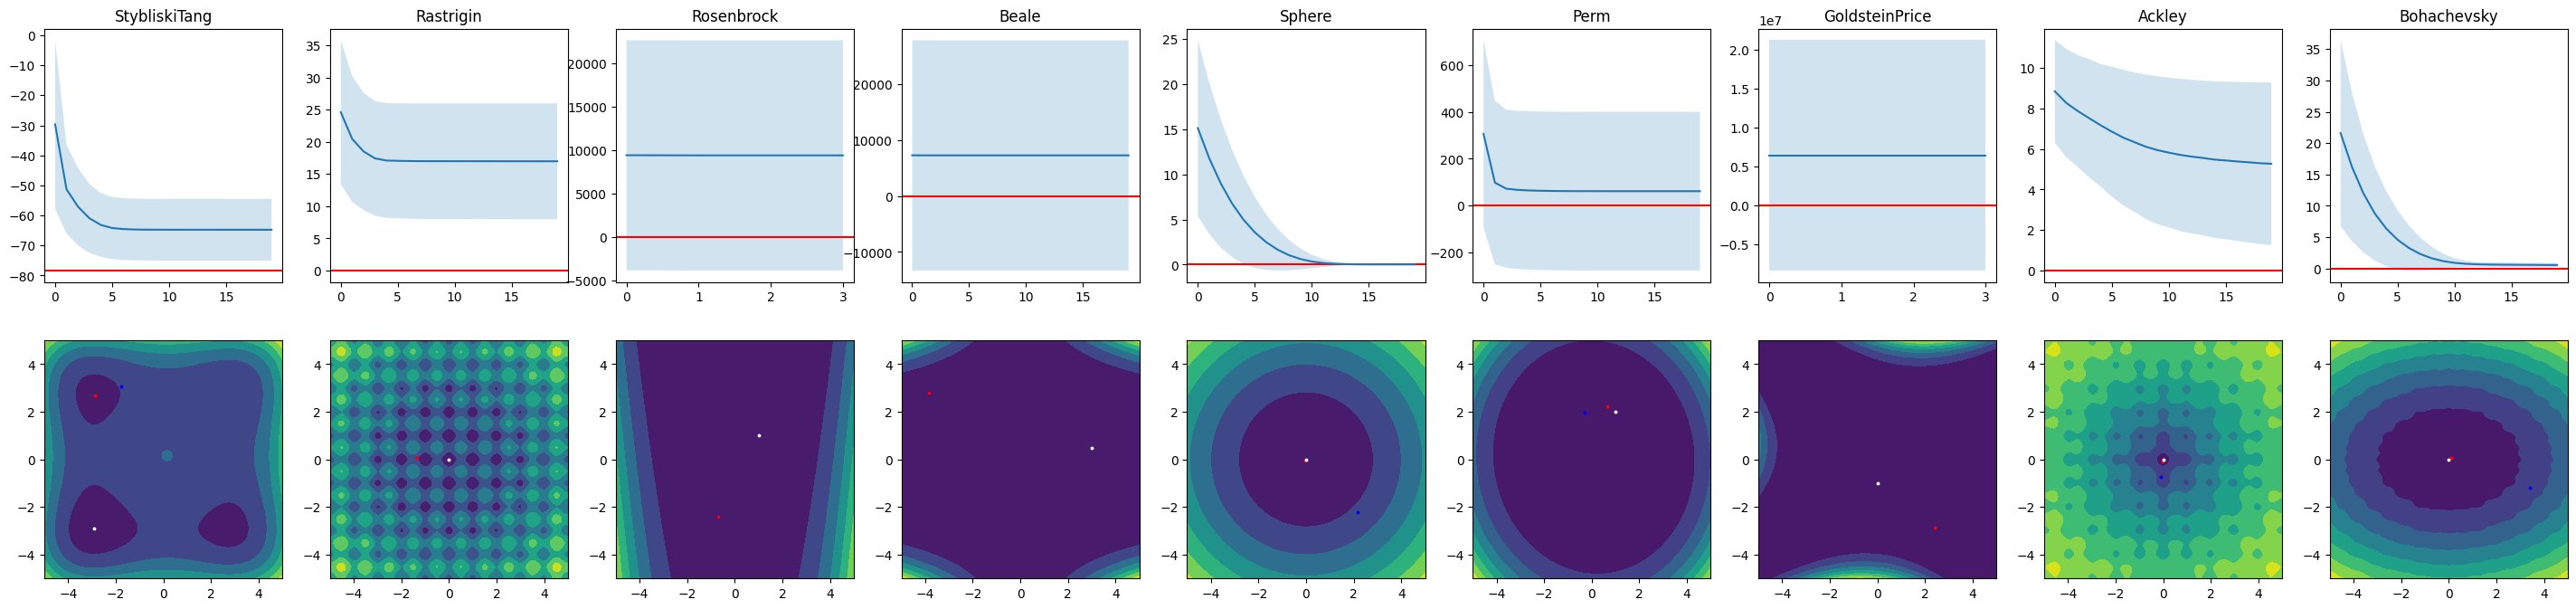

In [3]:
budget = 100
tests  = 250

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))

for idx, fcn in enumerate(test_functions):

    Fx = fcn(points.T)

    # Draw the test function
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled') 

    Y_log = []
    for test in range(tests):
        Xmin, Ymin, X, Y = response_surface(fcn, boundaries=[[-5,-5],[5,5]], dimension=2,sampling_budget=budget, tol = 1e-8, sampling_method="box_behnken", 
                                        sampling_bound=0.5, iteration_method="gradient", learning_rate=0.01, verbose=False)
        Y_log.append(Y)

    lmin = 0
    for l in Y_log: 
        if (len(l)> lmin): lmin = len(l)

    for i,l in enumerate(Y_log): 
        if (len(l) < lmin):
            for x in range(lmin-len(l)): 
                Y_log[i] = np.append(Y_log[i], Y_log[i][-1])

    Y_log = np.vstack(Y_log)

    Ystd  = np.std(Y_log, axis=0)
    Ymean = np.mean(Y_log, axis=0)


    # Draw the analyzed points
    #for x in X: ax[1,idx].scatter(x[0], x[1], c="orange", s=2)

    # Draw the initial and final point (or best)
    ax[1,idx].scatter(X[0,0],  X[0,1],  c="blue", s=3)
    ax[1,idx].scatter(Xmin[0], Xmin[1], c="red",  s=3)

    # Draw the true minimum
    Xmin_true = points[np.argmin(Fx)]
    ax[1,idx].scatter(Xmin_true[0], Xmin_true[1], c="white", s=3)

    # Plot the performances
    ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')

    ax[0,idx].plot(range(len(Ymean)), Ymean)
    ax[0,idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')

    ax[0,idx].set_title(fcn.__name__)
  
plt.show()

### 7 - Sobol sampling function

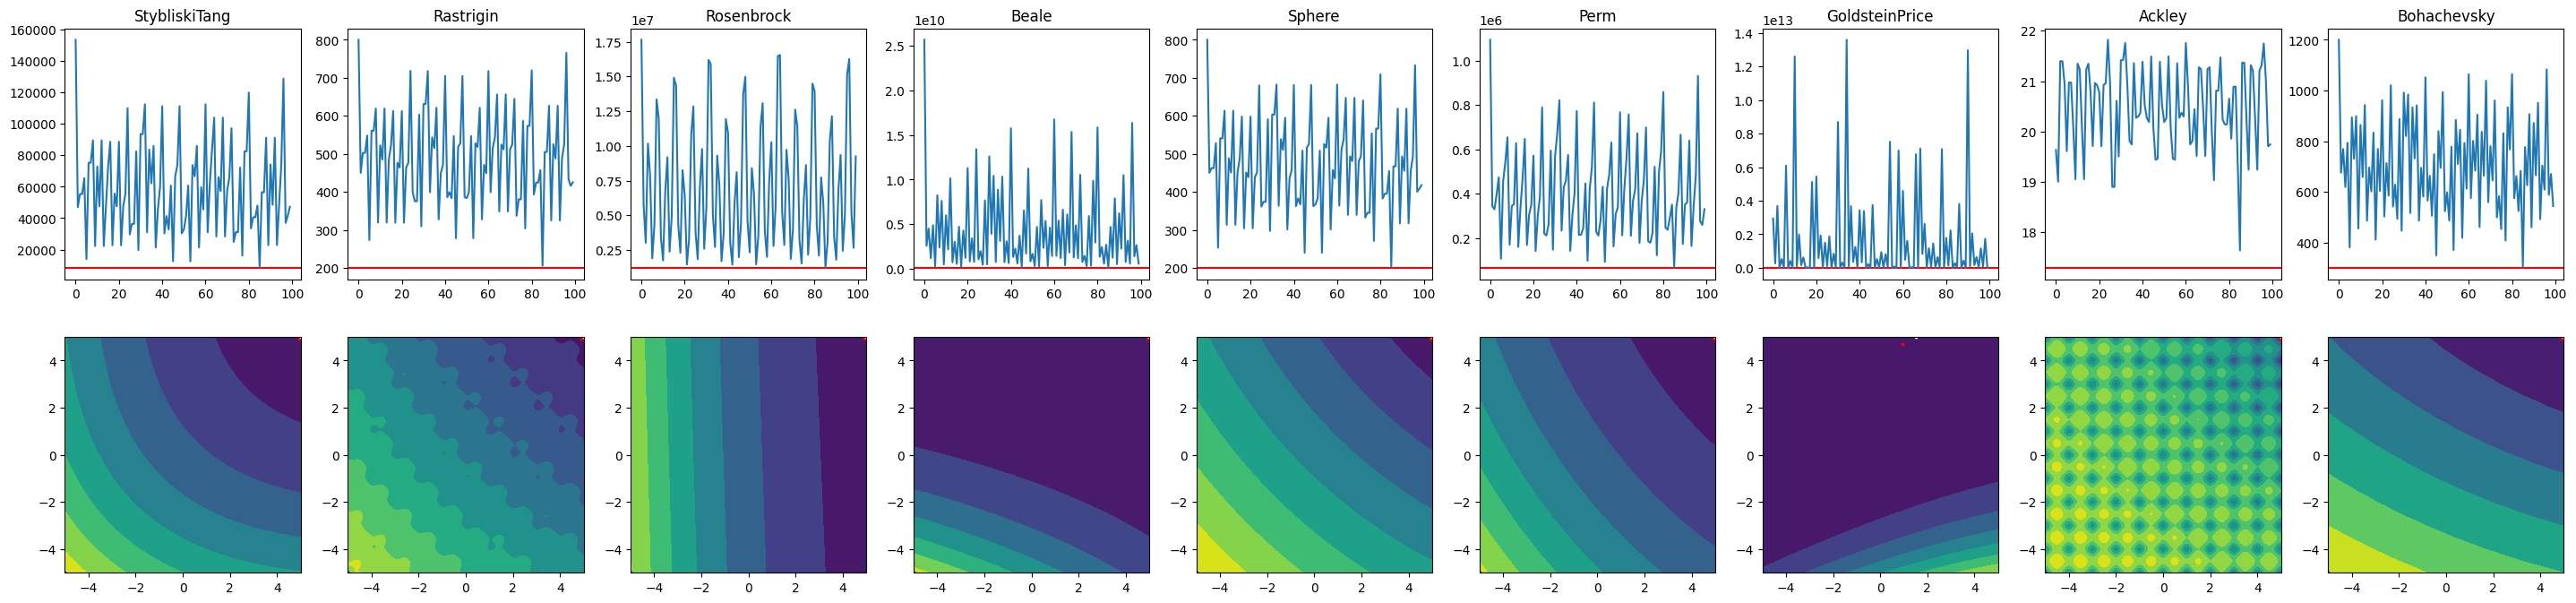

In [13]:
budget = 100
tests  = 250

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))

for idx, fcn in enumerate(test_functions):

    # Apply offset
    test_function = lambda x: fcn(x - 15)

    Fx = test_function(points.T)

    # Draw the test function
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled')  

    Y_log = []
    for test in range(tests):
        Xmin, Ymin, X, Y = sobol(test_function, n_samples=budget, dimension=2, boundaries=[[-5, -5],[5,5]])
        Y_log.append(Y)
    Y_log = np.vstack(Y_log)

    Ystd  = np.std(Y_log, axis=0)
    Ymean = np.mean(Y_log, axis=0)


    # Draw the analyzed points
    #for x in X: ax[1,idx].scatter(x[0], x[1], c="orange", s=2)

    # Draw the initial and final point (or best)
    ax[1,idx].scatter(X[0,0],  X[0,1],  c="blue", s=3)
    ax[1,idx].scatter(Xmin[0], Xmin[1], c="red",  s=3)

    # Draw the true minimum
    Xmin_true = points[np.argmin(Fx)]
    ax[1,idx].scatter(Xmin_true[0], Xmin_true[1], c="white", s=3)

    # Plot the performances
    ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')

    ax[0,idx].plot(range(len(Ymean)), Ymean)
    ax[0,idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')

    ax[0,idx].set_title(fcn.__name__)
  
plt.show()